## Gait Video Study
### SHAP-based feature importance for Cross generalization framework
For local interpretation explanations, see https://www.kdnuggets.com/2019/12/interpretability-part-3-lime-shap.html

For installation, run:
* !pip install --upgrade setuptools
* !conda install -c conda-forge shap

Required:
* Config path for the best subject gen model containing the "saved_model_path" as the best model's directory and params.pt file and the best model parameters as well
* Fold for which we are going to use training/validation and trained model for

### Reference materials:
* https://github.com/slundberg/shap
    * Force plot/Decision Plot: The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 
    * Beeswarm plot: To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.
    * Barplot: We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs).
    
* https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Scatter%20Density%20vs.%20Violin%20Plot%20Comparison.html
    * Violin plot: These are a standard violin plot but with outliers drawn as points. This gives a more accurate representation of the density out the outliers than a kernel density estimated from so few points. The color represents the average feature value at that position, so red regions have mostly high valued feature values while blue regions have mostly low feature values. 
    
    Here, red represents large values of a variable, and blue represents small ones. So, it becomes clear that large values of s5 do indeed increase the prediction, and vice versa. You can also see that others (like s6) are pretty evenly split, which indicates that while overall they’re still important, their interaction is dependent on other variables. (After all, the whole point of a tree model like xgboost is to capture these interactions, so we can’t expect to see everything in a single dimension!)
    
* https://www.kdnuggets.com/2019/12/interpretability-part-3-lime-shap.html
    * Shapley values overview: The parties participating in a Game are called Players. The different actions these players can take are called choices. If there is a finite set of choices for each player, there is also a finite set of combinations of choices of each player. So if each player plays a choice, it will result in an outcome, and if we quantify those outcomes, it’s called a payoff. And if we list all the combinations and the payoffs associated with it, it’s called payoff matrix. And Shapely values are an important concept in cooperative games. If we think about it, a machine learning prediction is like a game, where the different features (players), play together to bring an outcome (prediction). And since the features work together, with interactions between them, to make the prediction, this becomes a case of cooperative games. This is right up the alley of Shapely Values. 
    
    But there is just one problem. Calculating all possible coalitions and their outcomes quickly become infeasible as the features increase. Therefore, in 2013, Erik Štrumbelj et al. proposed an approximation using Monte-Carlo sampling. And in this construct, the payoff is modelled as the difference in predictions of different Monte-Carlo samples from the mean prediction. <Equation from the link>
    
    Let’s look at a few desirable mathematical properties of Shapely values, which makes it very desirable in interpretability application. Shapely Values is the only attribution method that satisfies the properties Efficiency, Symmetry, Dummy, and Additivity. And satisfying these together is considered to be the definition of a fair payout.

        * Efficiency – The feature contributions add up to the difference in prediction for x and average.
        * Symmetry – The contributions of two feature values should be the same if they contribute equally to all possible coalitions.
        * Dummy – A feature that does not change the predicted value, regardless of which coalition it was added to, should have the Shapely value of 0
        * Additivity – For a game with combined payouts, the respective Shapely values can be added together to get the final Shapely Value
    
    While all of the properties make this a desirable way of feature attribution, one, in particular, has a far-reaching effect – Additivity. This means that for an ensemble model like a RandomForest or Gradient Boosting, this property guarantees that if we calculate the Shapely Values of the features for each tree individually and average them, you’ll get the Shapely values for the ensemble. This property can be extended to other ensemble techniques like model stacking or model averaging as well.
    
    * SHAP: SHAP (SHapely Additive exPlanations) puts forward a unified approach to interpreting Model Predictions. Scott Lundberg et al. proposes a framework that unifies six previously existing feature attribution methods (including LIME and DeepLIFT) and they present their framework as an additive feature attribution model.

        * Similar to LIME, SHAP also attributes a large effect on marital_status, age, education_num, etc.
The force plot explains how different features pushed and pulled on the output to move it from the base_valueto the prediction. The prediction here is the probability or likelihood that the person earns >50k (cause that is the prediction for the instance).
In the force plot, you can see marital_status, education_num, etc. on the left-hand side pushing the prediction close to 1 and hours_per_week pushing in the other direction. We can see that from the base value of 0.24, the features have pushed and pulled to bring the output to 0.8
In the decision plot, the picture is a little more clear. You have a lot of features like the occupation features and others which pushes the model output lower but strong influences from age, occupation_Exec-managerial, education_num, and marital_statushas moved the needle all the way till 0.8.These explanations fit our mental model of the process.
    
        * This is a case where we misclassified. And here the prediction we are explaining is that the person earned <50k, whereas they actually are earning >50k.
The force plot shows an even match between both sides, but the model eventually converged to 0.6. The education, hours_worked, and the fact that this person is not in an exec-managerial role all tried to increase the likelihood of earning < 50k, because those were below average, whereas marital_status, the fact that he is self_employed, and his age, tried to decrease the likelihood.
One more contributing factor, as you can see, are the base values(or priors). The model is starting with a prior that is biased towards <=50k because in the training data, that is the likelihood the model has observed. So the features have to work extra hard to make the model believe that the person earns >50k.
This is more clear if you compare the decision plots of the two examples. In the second example, you can see a strong zig-zag pattern at the end where multiple strong influencers push and pull, resulting in less deviation from the prior belief.
    
        * The Dot chart is much more interesting, as it reveals much more information than the bar chart. In addition to the overall importance, it also shows up how the feature value affects the impact on model output. For example, we can see clearly that marital_status gives a strong influence on the positive side(more likely to have >50k) when the feature value is low. And we know from our label encoding that marital_status = 0, means married and 1 means single. So being marriedincreases your chance of earning >50k.
Side note: We cannot use a list of shap values when using plot_type = ‘dot. You will have to plot multiple charts to understand each class you are predicting
Similarly, if you look at age, you can see that when the feature value is low, almost always it contributes negatively to your chance of earning >50k. But when the feature value is high(i.e., you are older), there is a mixed bag of dots, which tells us that there is a lot of interaction effects with other features in making the decision for the model.
This is where the dependence plotscome in to picture. The idea is very similar to PD plots we reviewed in the last blog post. But instead of partial dependence, we use the SHAP values to plot the dependence. The interpretation remains the similar with minor modifications.
On the X-axis, it is the value of the feature, and on the Y-axis is the SHAP value or the impact it has on the model output. As you saw in the Dot chart, a positive impact means it is pushing the model output towards the prediction(>50k in our case) and negative means the other direction. So in the age dependence plot, we can see the same phenomenon we discussed earlier, but more clearly. When you are younger, the influence is mostly negative and when you are older the influence is positive.
    
    * Disadvantages of SHAP:
    As always, there are disadvantages that we should be aware of to effectively use the technique. If you were following along to find the perfect technique for explainability, I’m sorry to disappoint you. Nothing in life is perfect. So, let’s dive into the shortcomings.

    Computationally Intensive. TreeSHAP solves it to some extent, but it is still slow compared to most of the other techniques we discussed. KernelSHAP is just slow and becomes infeasible to calculate for larger datasets. (Although there are techniques like clustering using K-means to reduce the dataset before calculating the Shapely values, they are still slow)
    SHAP values can be misinterpretedas it is not the most intuitive of ideas. The concept that it represents not the actual difference in predictions, but the difference between actual prediction and mean predictions is a subtle nuance.
    SHAP does not create sparse explanationslike LIME. Humans prefer to have sparse explanations that fit well in the mental model. But adding a regularization term like what LIME does not guarantee Shapely values.
    KernelSHAP ignores feature dependence. Just like permutation importance, LIME, or any other permutation-based methods, KernelSHAP considers ‘unlikely’ samples when trying to explain the model.
    
* https://medium.com/bigdatarepublic/feature-importance-whats-in-a-name-79532e59eea3#:~:text=measure%20of%20interest.-,LIME,areas%20of%20the%20feature%20space.
    The sign shows whether the feature value moved the prediction toward malignant (positive SHAP) or benign (negative SHAP). The color reflects the order of magnitude of the feature values (low, medium, high). This way the plot immediately reveals that low (blue) values on the top ten features decrease the likelihood of a malignant tumor prediction.
    LIME and Shapley values are two local model-agnostic models. 
    
* https://evgenypogorelov.com/multiclass-xgb-shap.html#:~:text=As%20of%20May%202019%20SHAP,in%20the%20multi%2Dclass%20usecase.&text=Instead%20of%20the%20usual%20binary,the%20output%20is%20Log%20Odds.
     Greatly oversimplyfing, SHAP takes the base value for the dataset, in our case a 0.38 chance of survival for anyone aboard, and goes through the input data row-by-row and feature-by-feature varying its values to detect how it changes the base prediction holding all-else-equal for that row. For non-linear models the order in which the features are added matters so SHAP values arise from averaging the values across all possible orderings. In so doing, SHAP is essentially building a mini explainer model for a single row-prediction pair to explain how this prediction was reached. 
    The table below the plot is the full list of features and their SHAP additive weights. We can see very clearly the model brought down his probability of survival by 16% because sex_male == 1, and by an additional 5% because pclass_3 == 1. On the other hand, in his case a family_size == 0 slightly helped his odds along with embarked_S == 0.
    
    Above, we see being male is generally a bad thing, but the horizontal dispersion also implies that it depends on other factors. If it did not, we would see a single blob of red on the sex_male line instead of points spread across the X-axis with varying negative SHAP values. At a glance we also see high values for fare tended to aid in survival probability, meanwhile low values for age greatly helped the survival odds. 
    
    * Multiclass: This first obvious difference is SHAP will output a seperate matrix for each class prediction for the given input row. This means we have 3 plots to look at instead of just one. This is useful because a regulator may be just as interested in why you made a decision as they are in why you didn't make another.
    
* Decision Plot: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html#:~:text=Like%20a%20force%20plot%2C%20a,Communities%20and%20Crime%20data%20set.
    * The x-axis represents the model’s output. In this case, the units are log odds. Like the force plot, the decision plot supports link='logit' to transform log odds to probabilities.
    * The plot is centered on the x-axis at explainer.expected_value. All SHAP values are relative to the model’s expected value like a linear model’s effects are relative to the intercept. 
    * The y-axis lists the model’s features. By default, the features are ordered by descending importance. The importance is calculated over the observations plotted. This is usually different than the importance ordering for the entire dataset. In addition to feature importance ordering, the decision plot also supports hierarchical cluster feature ordering and user-defined feature ordering. 
    * Each observation’s prediction is represented by a colored line. At the top of the plot, each line strikes the x-axis at its corresponding observation’s predicted value. This value determines the color of the line on a spectrum. 
    * Moving from the bottom of the plot to the top, SHAP values for each feature are added to the model’s base value. This shows how each feature contributes to the overall prediction. * At the bottom of the plot, the observations converge at explainer.expected_value.
    
    * **Multioutput decision plot:** Plot SHAP values for observation #2 using shap.multioutput_decision_plot. The plot’s default base value is the average of the multioutput base values. The SHAP values are adjusted accordingly to produce accurate predictions. The dashed (highlighted) line indicates the model’s predicted class. For this observation, the model is confident that disease is present, but it cannot easily distinguish between classes 3, 4, and 5. 
    For observation #3, the model confidently predicts that disease is not present.
    
* https://github.com/slundberg/shap/issues/367
    SHAP values of a model's output explain how features impact the output of the model. 
    * For multiclass bar plot: For f16 , mean(|SHAP|) is about 1.7 on Classs 4, and (2.8-1.6)=1.2 on Class 0, it means f16 influence predicting Class 4 more than Class 0. Also the f16 is the most influential feature
    * For beeswarm/violin summary plot: For f11, if f11 value being higher, the model tends to classify the data to CLASS 0. Features should be roughly centered since we are asking the impact of knowing vs. not knowing the feature.
    
* https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b
    * Force plot: The base logit value for the positive class over the training dataset is -1.538. The logit prediction for this sample is -0.27. PAY_2 = 2 months (i.e. repayment status for the month of Aug/2005 = 2 months delay) contributed maximum to increase the logit; followed by LIMIT_BAL = 5e+4.
    
* https://towardsdatascience.com/interpreting-recurrent-neural-networks-on-multivariate-time-series-ebec0edb8f5a
    Refer to write SHAP theory

* https://towardsdatascience.com/interpreting-your-deep-learning-model-by-shap-e69be2b47893#:~:text=SHAP%20provides%20multiple%20explainers%20for,Support%20TensorFlow%20and%20Keras%20models.
    Refer to write SHAP theory


In [60]:
from importlib import reload
from ml_utils.imports import *

from ml_utils import cross_gen_DLtrainer, DLutils, CNN1d_model, gait_data_loader, TCN_model, LSTM_model, GRU_model, RNN_model, MULTISCALE_RESNET_model, RESNET_model
reload(cross_gen_DLtrainer)
reload(DLutils)
reload(CNN1d_model)
reload(TCN_model)
reload(LSTM_model)
reload(GRU_model)
reload(RNN_model)
reload(RESNET_model)
reload(MULTISCALE_RESNET_model)
from ml_utils.DLutils import set_random_seed, accuracy_score_multi_class
from ml_utils.cross_gen_DLtrainer import GaitTrainer
from ml_utils.CNN1d_model import CNN1D
from ml_utils.TCN_model import TCN
from ml_utils.LSTM_model import LSTM
from ml_utils.GRU_model import GRU
from ml_utils.RNN_model import RNN
from ml_utils.MULTISCALE_RESNET_model import MSResNet
from ml_utils.RESNET_model import ResNet
from ml_utils.gait_data_loader import GaitDataset
import shap
from scipy.special import softmax

In [61]:
#Config path for the best subject gen model containing the "saved_model_path" as the 
#best model's directory and params.pt file and the best model parameters as well
config_path = ".\config_files\config_template_cross_gen_shap_cnn.json"
#Fold index for which we are going to use training/validation and trained model for
#!!! Note that 0 means 1st fold and 4 means 5th fold in this case !!!
fold_index = 0

#Set up vars for parsing
hyperparameter_grid = {}
parameter_dict = {}

#Load config
with open(config_path) as f: 
    config_data = f.read()

config = json.loads(config_data)

#Parse through imported dictionary
for key, value in config.items():
    if 'param_' in key:
        pkey = key.replace("param_", "")
        if 'optimizer' in pkey:
            op = []
            for optim_string in value:
                op.append(optims[optim_string])
            hyperparameter_grid[pkey] = op
        else:
            hyperparameter_grid[pkey] = value
    else:
        parameter_dict[key] = value      

In [62]:
use_cuda = torch.cuda.is_available() #use_cuda is True if cuda is available 
set_random_seed(0, use_cuda) #Setting a fixed random seed for reproducibility 
device = torch.device("cuda" if use_cuda else "cpu")

In [63]:
if parameter_dict["model"]=="CNN1D":
    in_chans = hyperparameter_grid["net__module__in_chans"][0]
    out_chans = hyperparameter_grid["net__module__out_chans"][0]
    kernel_size = hyperparameter_grid["net__module__kernel_size"][0]
    stride = hyperparameter_grid["net__module__stride"][0]
    dilation = hyperparameter_grid["net__module__dilation"][0]
    groups = hyperparameter_grid["net__module__groups"][0]
    batch_norm = hyperparameter_grid["net__module__batch_norm"][0]
    dropout = hyperparameter_grid["net__module__dropout"][0]
    maxpool = hyperparameter_grid["net__module__maxpool"][0]
    maxpool_kernel_size = hyperparameter_grid["net__module__maxpool_kernel_size"][0]
    dense_out_sizes = hyperparameter_grid["net__module__dense_out_sizes"][0]
    dense_pool = hyperparameter_grid["net__module__dense_pool"][0]
    dense_pool_kernel_size= hyperparameter_grid["net__module__dense_pool_kernel_size"][0]
    dense_dropout = hyperparameter_grid["net__module__dense_dropout"][0]
    global_average_pool = hyperparameter_grid["net__module__global_average_pool"][0]
    num_classes = hyperparameter_grid["net__module__num_classes"][0] 
    time_steps = hyperparameter_grid["net__module__time_steps"][0]
    position_encoding = hyperparameter_grid["net__module__position_encoding"][0]
    model_ = CNN1D(in_chans, out_chans, kernel_size, stride, dilation, groups, batch_norm, dropout, maxpool, maxpool_kernel_size, dense_out_sizes, dense_pool, dense_pool_kernel_size, dense_dropout, global_average_pool, num_classes, time_steps, position_encoding)

if parameter_dict["model"] == "Resnet":
    in_chans = 36
    initial_conv_layer = True
    block_name = 'basic_block' #'bottleneck' 
    layers = [1, 1, 1, 0]
    kernel_size_conv1 = 1 
    kernel_size_conv2 = 3 
    kernel_size_conv3 = 1, 
    stride_layer64 = [1, 1, 1] 
    stride_layer128 = [1, 2, 1]
    stride_layer256 = [1, 2, 1]
    stride_layer512 = [1, 2, 1]  
    position_encoding = False
    num_classes=3
    model_ = ResNet(in_chans, initial_conv_layer, block_name, layers, kernel_size_conv1, kernel_size_conv2, kernel_size_conv3, stride_layer64, stride_layer128, stride_layer256, stride_layer512, position_encoding, num_classes)
    
if parameter_dict["model"] == "MSResnet":
    in_chans = 36
    layers=[1, 1, 1, 1]
    num_classes = 3
    model_ = MSResNet(in_chans, layers, num_classes) 
    
if parameter_dict["model"]=="TCN":
    in_chans = 36
    out_chans = 3
    num_channels = [20]*2
    kernel_size = 3
    dropout = 0.3
    model_ = TCN(in_chans, out_chans, num_channels, kernel_size, dropout) 

if (parameter_dict["model"]=="LSTM") or (parameter_dict["model"]=="GRU") or (parameter_dict["model"]=="RNN"):
    in_chans = 36 #36 body coordinate features 
    hidden_size1 = 30
    num_layers1 = 3
    hidden_size2 = 20
    num_layers2 = 2
    num_classes = 3
    dropout = 0.3
    bidirectional = False
    pre_out = 50
    single_layer = False
    linear_size = 1 #Default is 1 for a single FC layer after the LSTM layers
    use_layernorm = False
    hyperparameter_grid['net__module__batch_size'] = hyperparameter_grid['net__batch_size']
    hyperparameter_grid['net__module__device1'] = [device]
    
    if parameter_dict["model"]=="LSTM":
        model_ = LSTM(in_chans, hidden_size1, num_layers1, hidden_size2, num_layers2, num_classes, dropout, bidirectional, pre_out, single_layer, linear_size, use_layernorm, hyperparameter_grid['net__module__batch_size'][0], hyperparameter_grid['net__module__device1'][0])   
    
    if parameter_dict["model"]=="GRU":
        model_ = GRU(in_chans, hidden_size1, num_layers1, hidden_size2, num_layers2, num_classes, dropout, bidirectional, pre_out, single_layer, linear_size, use_layernorm, hyperparameter_grid['net__module__batch_size'][0], hyperparameter_grid['net__module__device1'][0])   
    
    if parameter_dict["model"]=="RNN":
        model_ = RNN(in_chans, hidden_size1, num_layers1, hidden_size2, num_layers2, num_classes, dropout, bidirectional, pre_out, single_layer, linear_size, use_layernorm, hyperparameter_grid['net__module__batch_size'][0], hyperparameter_grid['net__module__device1'][0])   

In [64]:
trainer = GaitTrainer(parameter_dict, hyperparameter_grid, config_path)
#Initial setup for SHAP for Task Generalization 
trainer.cross_gen_shap_initial_setup(model_, device_ = device, fold_index = fold_index)

Original number of subjects in training task W are: 32
Original number of subjects in testing task WT are: 26
Common number of subjects across train and test frameworks:  25
Common subjects across train and test frameworks:  [404, 405, 406, 407, 408, 409, 410, 411, 310, 311, 313, 314, 318, 320, 321, 322, 323, 212, 213, 214, 215, 216, 217, 218, 219]
Number of subjects only in training framework:  7
Subjects only in training framework:  [102, 112, 113, 115, 312, 123, 124]
Number of subjects only in test framework:  1
Subjects only in test framework:  [403]
******************************************
save path:  C:\Users\Rachneet Kaur\Box\Gait Video Project\DLResults\task_and_subject_WtoWT/CNN1D\cnn1d_try_cross_gen_2021_05_30-15_42_22_550224/
setting random seed to:  0


In [65]:
trainer.model, trainer.X_sl_train, trainer.Y_sl_train, trainer.X_sl_test, trainer.Y_sl_test

(<class 'skorch.net.NeuralNet'>[initialized](
   module_=CNN1D(
     (pos_encoding_layer): PositionalEncoder()
     (dense_maxpool_layer): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (cnn_network): Sequential(
       (0): ConvBlock(
         (conv1): Conv1d(36, 64, kernel_size=(8,), stride=(1,))
         (batch_norm_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu): ReLU()
         (dropout_layer): Dropout(p=0.3, inplace=False)
         (convblock_net): Sequential(
           (0): Conv1d(36, 64, kernel_size=(8,), stride=(1,))
           (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
           (2): ReLU()
           (3): Dropout(p=0.3, inplace=False)
         )
       )
       (1): ConvBlock(
         (conv1): Conv1d(64, 128, kernel_size=(5,), stride=(1,))
         (relu): ReLU()
         (dropout_layer): Dropout(p=0, inplace=False)
         (convblock_net): S

### Checks on the loaded model

In [52]:
trainer.model.module.state_dict()['cnn_network.0.batch_norm_layer.weight']

tensor([1.0029, 1.0015, 0.9983, 1.0005, 1.0029, 1.0007, 1.0029, 1.0001, 1.0023,
        1.0027, 1.0024, 1.0004, 1.0003, 1.0023, 1.0023, 1.0003, 1.0016, 0.9999,
        1.0030, 1.0030, 1.0022, 1.0030, 1.0013, 1.0015, 1.0028, 1.0005, 1.0027,
        1.0012, 1.0016, 1.0016, 1.0018, 0.9996, 0.9991, 0.9999, 1.0003, 0.9998,
        0.9997, 1.0028, 1.0028, 1.0026, 0.9999, 1.0029, 1.0012, 1.0008, 1.0009,
        1.0003, 1.0024, 1.0016, 1.0010, 1.0028, 1.0020, 0.9992, 1.0004, 1.0005,
        0.9990, 1.0027, 1.0020, 1.0030, 1.0014, 1.0031, 1.0025, 1.0029, 1.0027,
        1.0021])

In [51]:
trainer.model.module_.state_dict()['cnn_network.0.batch_norm_layer.weight']

tensor([1.0029, 1.0015, 0.9983, 1.0005, 1.0029, 1.0007, 1.0029, 1.0001, 1.0023,
        1.0027, 1.0024, 1.0004, 1.0003, 1.0023, 1.0023, 1.0003, 1.0016, 0.9999,
        1.0030, 1.0030, 1.0022, 1.0030, 1.0013, 1.0015, 1.0028, 1.0005, 1.0027,
        1.0012, 1.0016, 1.0016, 1.0018, 0.9996, 0.9991, 0.9999, 1.0003, 0.9998,
        0.9997, 1.0028, 1.0028, 1.0026, 0.9999, 1.0029, 1.0012, 1.0008, 1.0009,
        1.0003, 1.0024, 1.0016, 1.0010, 1.0028, 1.0020, 0.9992, 1.0004, 1.0005,
        0.9990, 1.0027, 1.0020, 1.0030, 1.0014, 1.0031, 1.0025, 1.0029, 1.0027,
        1.0021])

In [45]:
print (trainer.model.forward({'body_coords': train_body_coords, 'frame_count': train_frame_count}))
print (trainer.model.module(train_body_coords, train_frame_count))
print (trainer.model.module_(train_body_coords, train_frame_count))

tensor([[ 0.2519, -0.1528, -1.5463],
        [ 0.3998, -0.2228, -1.5469],
        [ 0.3553, -0.2015, -1.5200],
        ...,
        [-0.0236,  0.0807, -1.2899],
        [-0.2251,  0.0730, -1.6702],
        [-0.2726, -0.0123, -2.0758]])
tensor([[ 0.2519, -0.1528, -1.5463],
        [ 0.3998, -0.2228, -1.5469],
        [ 0.3553, -0.2015, -1.5200],
        ...,
        [-0.0236,  0.0807, -1.2899],
        [-0.2251,  0.0730, -1.6702],
        [-0.2726, -0.0123, -2.0758]], grad_fn=<AddmmBackward>)
tensor([[ 0.2519, -0.1528, -1.5463],
        [ 0.3998, -0.2228, -1.5469],
        [ 0.3553, -0.2015, -1.5200],
        ...,
        [-0.0236,  0.0807, -1.2899],
        [-0.2251,  0.0730, -1.6702],
        [-0.2726, -0.0123, -2.0758]], grad_fn=<AddmmBackward>)


### Back to computing SHAP

In [7]:
#Rearranging the training data to fit the SHAP requirements 
train_body_coords = [trainer.X_sl_train[index]['body_coords'] for index in range(len(trainer.X_sl_train))]
train_body_coords = torch.stack(train_body_coords) 

train_frame_count = [trainer.X_sl_train[index]['frame_count'] for index in range(len(trainer.X_sl_train))]
train_frame_count = torch.stack(list(map(torch.tensor, train_frame_count)))

train_data = [train_body_coords, train_frame_count]
print ('Train data stats: ', len(train_data), train_data[0].shape, train_data[1].shape)

#SHAP Deep Explainer for CNN
explainer = shap.DeepExplainer(trainer.model.module_, train_data)

Train data stats:  2 torch.Size([1207, 20, 36]) torch.Size([1207])


In [8]:
#Rearranging the testing data to fit the SHAP requirements 
test_body_coords = [trainer.X_sl_test[index]['body_coords'] for index in range(len(trainer.X_sl_test))]
test_body_coords = torch.stack(test_body_coords)

test_frame_count = [trainer.X_sl_test[index]['frame_count'] for index in range(len(trainer.X_sl_test))]
test_frame_count = torch.stack(list(map(torch.tensor, test_frame_count)))

test_data = [test_body_coords, test_frame_count]
print ('Test data stats: ', len(test_data), test_data[0].shape, test_data[1].shape)

#Running the SHAP explainer for test set
shap_values = explainer.shap_values(test_data)

Test data stats:  2 torch.Size([212, 20, 36]) torch.Size([212])


In [9]:
#To check the PID and thus the true label for the current test set index
#This will also help in finding the predicted label for this instance 
trainer.PID_sl_test

In [10]:
#Stats for the SHAP values
print (len(shap_values)) #Since we have 3 classes
print (len(shap_values[0]), len(shap_values[1]), len(shap_values[2])) 
#Since we have 2 types of inputs, namely body coordinates and frame count
print (shap_values[0][0].shape) #Since body coords is 20*36

3
2 2 2
(212, 20, 36)


In [11]:
#Postprocessing the SHAP values to reshape to num_classes x num_samples x num_features i.e. across 
#the body coords, we would need to average the 20 SHAP values for 20 time steps to one SHAP value 
#per sample and feature. 
classes = [0, 1, 2]
shaps_feature_wise = []
for class_index in classes:
    #For body coords, averaging across the 20 time steps to have one SHAP value 
    #for each instance, feature pair
    shap_body_coords = shap_values[class_index][0].mean(axis = 1)
    #For frame count
    shap_frame_count = shap_values[class_index][1].reshape(-1, 1)
    shap_feature_wise = np.concatenate((shap_body_coords, shap_frame_count), axis = 1)
    shaps_feature_wise.append(shap_feature_wise) 

In [12]:
#As the SHAP values for body coords are now one feature per sample, and thus we need to average 
#the original test set body coords values as well to have one feature per sample 
Xtest_feature_wise = np.concatenate((test_data[0].mean(axis = 1), test_data[1].reshape(-1, 1)), axis = 1)
order = ['Right Hip', 'Right Knee', 'Right Ankle', 'Left Hip', 'Left Knee', 'Left Ankle', 'Left Big Toe', 'Left Little Toe', \
         'Left Heel', 'Right Big Toe', 'Right Little Toe', 'Right Heel']
feature_names = [o + '-'+ y for o in order for y in ['x', 'y', 'z']] + ['Frame Count']
Xtest_feature_wise_df = pd.DataFrame(Xtest_feature_wise, columns= feature_names)

print (shaps_feature_wise[0].shape, Xtest_feature_wise_df.shape)

(212, 37) (212, 37)


## SHAP Vizualizations 

In [13]:
# init the JS visualization code
shap.initjs()

### Global feature importance Bar Plot 
### This has all 3 classes included in a single plot 

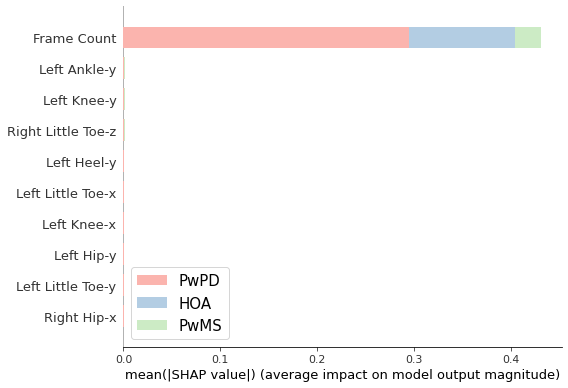

In [14]:
#Global feature importance Bar Plot 
#This has all 3 classes included in a single plot 
#max_display handles number of top important features to display
shap.summary_plot(shap_values = shaps_feature_wise, features = Xtest_feature_wise_df, plot_type='bar', \
                  class_names= ['HOA', 'PwMS', 'PwPD'], max_display=10, show=False,  color=plt.get_cmap("Pastel1"))
f = plt.gcf()
plt.tight_layout()
plt.legend(fontsize = 15)
#All plots are saved to SHAPResults directory
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + '/shap_global_bar.png', dpi = 350)

### Global feature importance Beeswarm plot
### We need 3 different plots for 3 classes in this case 

For HOA


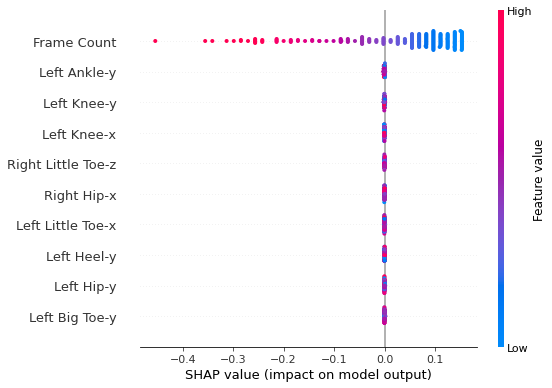

In [15]:
#Global feature importance Beeswarm plot for HOA
print ('For HOA')
#max_display handles number of top important features to display
shap.summary_plot(shap_values = shaps_feature_wise[0], features = Xtest_feature_wise_df, \
                  max_display=10, show=False)
f = plt.gcf()
plt.tight_layout()
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + '/shap_global_beeswarm_HOA.png', dpi = 350)

For PwMS


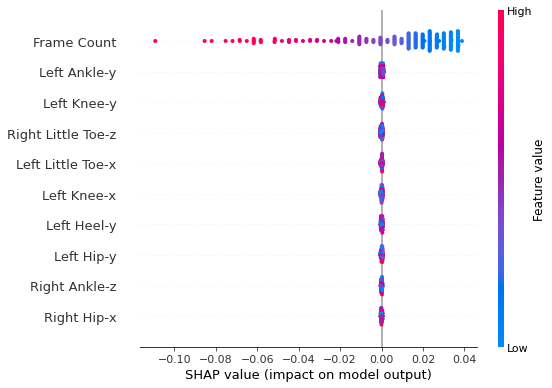

In [16]:
print ('For PwMS')
#max_display handles number of top features to display
shap.summary_plot(shap_values = shaps_feature_wise[1], features = Xtest_feature_wise_df, \
                  max_display=10, show=False)
f = plt.gcf()
plt.tight_layout()
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + '/shap_global_beeswarm_PwMS.png', dpi = 350)

For PwPD


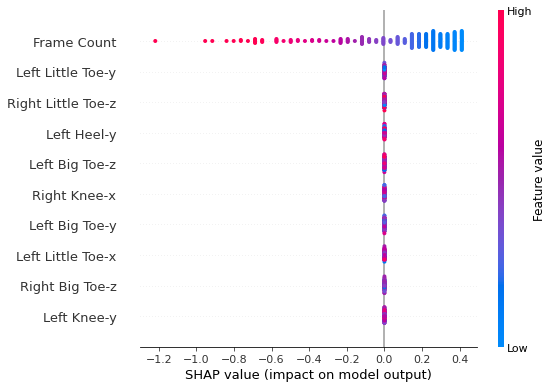

In [17]:
print ('For PwPD')
#max_display handles number of top features to display
shap.summary_plot(shap_values = shaps_feature_wise[2], features = Xtest_feature_wise_df, \
                  max_display=10, show=False)
f = plt.gcf()
plt.tight_layout()
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + '/shap_global_beeswarm_PwPD.png', dpi = 350)

### Global feature importance Violin plot
### We need 3 different plots for 3 classes in this case 

For HOA


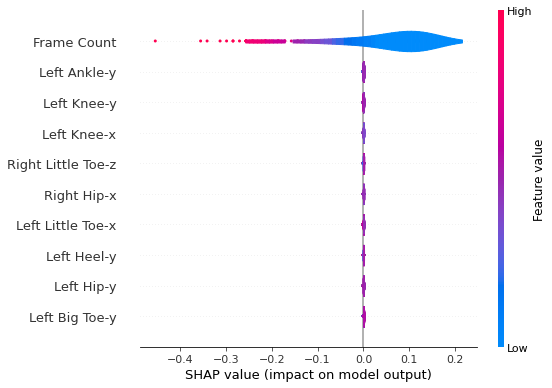

In [21]:
#Global feature importance Violin plot for HOA
print ('For HOA')
#max_display handles number of top important features to display
shap.summary_plot(shap_values = shaps_feature_wise[0], features = Xtest_feature_wise_df, \
                  max_display=10, show=False, plot_type = "violin")
f = plt.gcf()
plt.tight_layout()
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + '/shap_global_violin_HOA.png', dpi = 350)

For PwMS


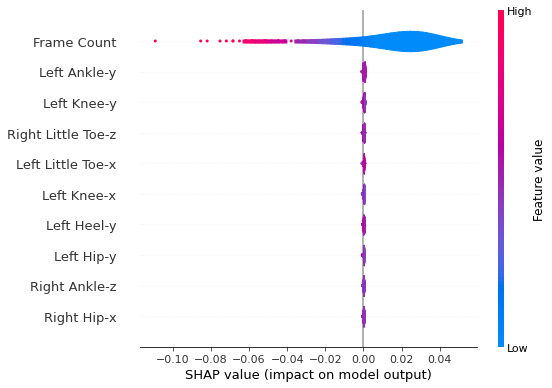

In [22]:
print ('For PwMS')
#max_display handles number of top features to display
shap.summary_plot(shap_values = shaps_feature_wise[1], features = Xtest_feature_wise_df, \
                  max_display=10, show=False, plot_type = "violin")
f = plt.gcf()
plt.tight_layout()
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + '/shap_global_violin_PwMS.png', dpi = 350)

For PwPD


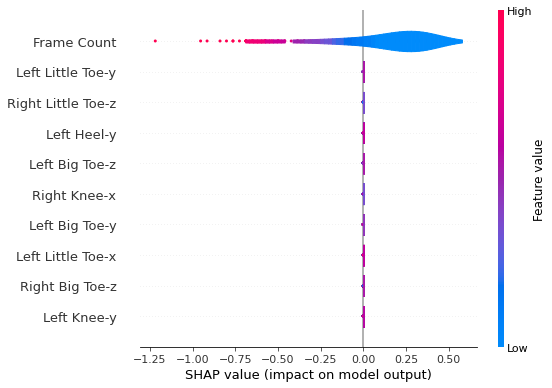

In [23]:
print ('For PwPD')
#max_display handles number of top features to display
shap.summary_plot(shap_values = shaps_feature_wise[2], features = Xtest_feature_wise_df, \
                  max_display=10, show=False, plot_type = "violin")
f = plt.gcf()
plt.tight_layout()
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + '/shap_global_violin_PwPD.png', dpi = 350)

### Local feature importance force plot
### We need 3 different plots for 3 classes in this case and each plot explains a single instance 

In [24]:
#Force plot local interpretations 
#Expected value is the list of length number of classes. So, we must choose which label are we trying to explain.
#We may choose depending on the true and predicted label for the current instance we wish to explain 
print ('Expected values: ', explainer.expected_value)
classes = [0, 1, 2]
class_to_explain = 0 #0 for HOA, 1 for MS, and 2 for PD
out_names_ = ['HOA', 'PwMS', 'PwPD']
instance_to_explain = 0 #Let's explain the first test set instance 
print ('True label: ', trainer.Y_sl_test[instance_to_explain])
print ('True PID: ', trainer.PID_sl_test[instance_to_explain])

for class_to_explain in classes:
# plot the explanation of the first prediction
    force_ = shap.force_plot(
        base_value=explainer.expected_value[class_to_explain],
        shap_values=shaps_feature_wise[class_to_explain][instance_to_explain],
        features=Xtest_feature_wise_df.iloc[instance_to_explain],
        feature_names=Xtest_feature_wise_df.columns,
        link="logit",
        out_names=out_names_[class_to_explain]
    )
    #This plot doesn't display but is directly saved at the specified path 
    shap.save_html('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + \
              '/shap_local_force_instance' + str(instance_to_explain) + '_' + out_names_[class_to_explain] + '.htm', force_)

#Display all features and SHAP values
#The table below the plot is the full list of features and their 
#SHAP additive weights.
#Display all features and SHAP values for all 3 classes 
df1=pd.DataFrame(data=shaps_feature_wise[0][instance_to_explain].reshape(1,-1), \
                     columns=Xtest_feature_wise_df.columns, index=[0]).transpose().sort_values(by=0, ascending=True)
df2=pd.DataFrame(data=shaps_feature_wise[1][instance_to_explain].reshape(1,-1), \
                     columns=Xtest_feature_wise_df.columns, index=[1]).transpose().sort_values(by=1, ascending=True)
df3=pd.DataFrame(data=shaps_feature_wise[2][instance_to_explain].reshape(1,-1), \
                     columns=Xtest_feature_wise_df.columns, index=[2]).transpose().sort_values(by=2, ascending=True)
df=pd.concat([df1,df2,df3], axis = 1)
df.columns = ['HOA', 'PwMS', 'PwPD']
display(df.transpose())
#This first obvious difference is SHAP will output a seperate matrix 
#for each class prediction for the given input row. This means we have 
#3 plots to look at instead of just one. This is useful because a 
#regulator may be just as interested in why you made a decision as 
#they are in why you didn't make another.
#The units for force and decision plots are probabilities for predicting 
#the particular class for that instance vs. not that class 
#The class with the highest prediction probability is the predicted target

Expected values:  [ 0.04363409 -0.06809884 -1.6785666 ]
True label:  tensor(2)
True PID:  tensor([403.])


,Frame Count,Left Knee-y,Right Little Toe-x,Left Heel-y,Left Ankle-z,Left Knee-z,Right Knee-y,Right Little Toe-z,Right Knee-z,Left Hip-x,...,Right Big Toe-y,Left Heel-z,Right Hip-z,Left Ankle-y,Right Hip-x,Left Heel-x,Left Big Toe-y,Left Hip-z,Left Knee-x,Left Ankle-x
HOA,-0.016178,-0.000520,-0.000503,-0.000481,-0.000478,-0.000471,-0.000181,-0.000177,-0.000133,-0.000095,...,0.000373,0.000457,0.000525,0.000563,0.000584,0.000631,0.000668,0.000668,0.000735,0.000842
PwMS,-0.003919,0.000302,0.000250,0.000213,0.000240,0.000309,0.000107,0.000065,-0.000064,-0.000030,...,-0.000050,-0.000054,-0.000185,-0.000188,-0.000228,-0.000173,-0.000281,-0.000321,-0.000302,-0.000284
PwPD,-0.043513,0.000064,0.000378,-0.000016,0.000144,0.000238,0.000099,-0.000198,-0.000020,-0.000011,...,-0.000040,0.000313,0.000101,0.000117,-0.000085,-0.000049,0.000027,0.000052,-0.000122,0.000272


In [25]:
shaps_feature_wise[class_to_explain][instance_to_explain].shape, Xtest_feature_wise_df.columns.shape

((37,), (37,))

### Local feature importance decision plot
### We need 3 different plots for 3 classes in this case and each plot explains a single instance only

Expected values:  [ 0.04363409 -0.06809884 -1.6785666 ]
True label:  tensor(2)
For  HOA
For  PwMS
For  PwPD


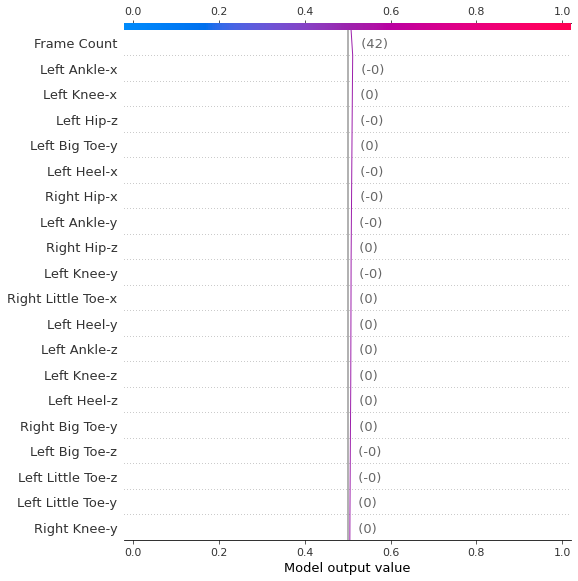

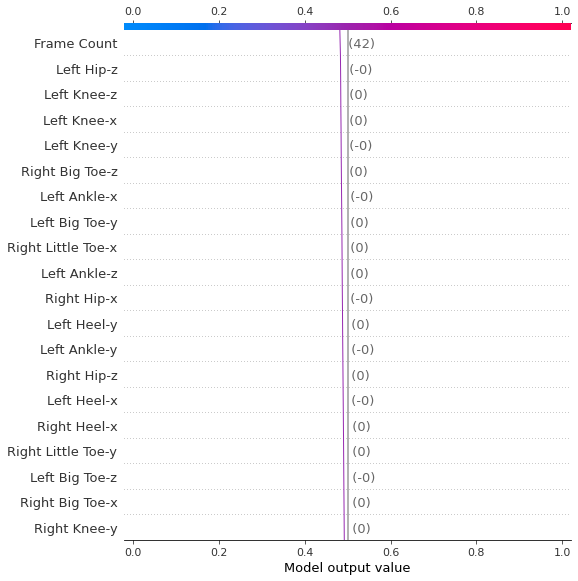

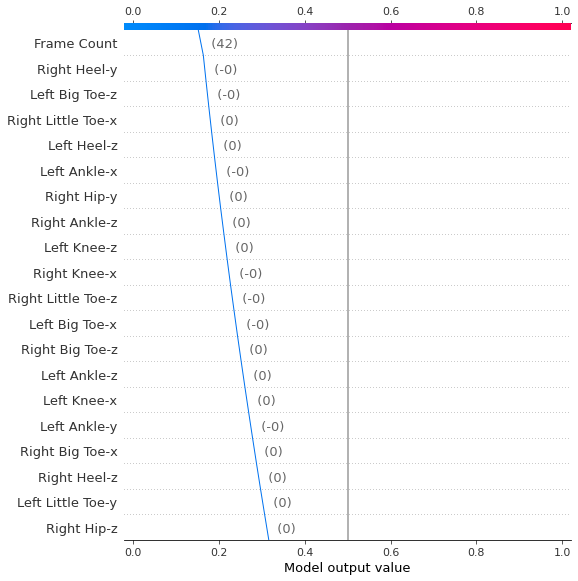

<Figure size 432x288 with 0 Axes>

In [26]:
##Decision plot local interpretations 
#Expected value is the list of length number of classes. So, we must choose which label are we trying to explain.
#We may choose depending on the true and predicted label for the current instance we wish to explain 
print ('Expected values: ', explainer.expected_value)
class_to_explain = 0 #0 for HOA, 1 for MS, and 2 for PD
instance_to_explain = 0 #Let's explain the first test set instance 
print ('True label: ', trainer.Y_sl_test[instance_to_explain])

# We provide new_base_value as the cutoff probability for the classification mode
# This is done to increase the interpretability of the plot 
new_base_value=0

for class_to_explain in classes:
    # plot the explanation of the first prediction
    shap.decision_plot(
        base_value=explainer.expected_value[class_to_explain],
        shap_values=shaps_feature_wise[class_to_explain][instance_to_explain],
        features=Xtest_feature_wise_df.iloc[instance_to_explain],
        feature_names=Xtest_feature_wise_df.columns.to_list(),
        link="logit",
        new_base_value=0,
        show = False
    )
    f = plt.gcf()
    plt.figure()
    print ('For ', out_names_[class_to_explain])
    
    plt.tight_layout()
    f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + \
          '/shap_local_decision_instance' + str(instance_to_explain) + '_' + out_names_[class_to_explain] + '.png', dpi = 350)
    f.show()

### Local feature importance multioutput decision plot
### This plots all 3 classes in a single decision plot explaining a particular single instance only (basically merges all the 3 plots above)

In [28]:
## Important ##
## We would need to manually write the predicted probabilities for 3 classes from the three force plots generated for this 
#instance we need to explain 
prob_predictions_from_force_plot = [0.51, 0.48, 0.15]

#This function assigns legend to the multioutput decision plot with cohort name and it's
#corresponding prediction probability 
def class_labels():
    return [f'Class {out_names_[i]} ({prob_predictions_from_force_plot[i]})' for i in classes]

Expected values:  [ 0.04363409 -0.06809884 -1.6785666 ]
Probability version of expected values:  [0.482403   0.43140483 0.08619215]
True label:  tensor(2)
For all 3 classes in same plot: 


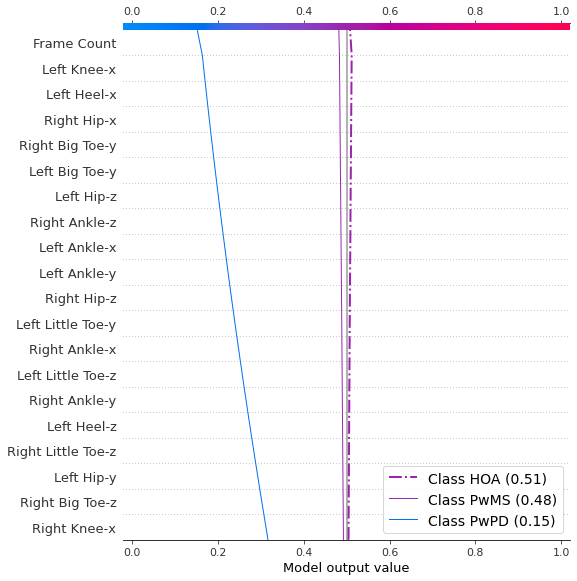

<Figure size 432x288 with 0 Axes>

In [32]:
##Decision plot local interpretations 
#Expected value is the list of length number of classes. So, we must choose which label are we trying to explain.
#We may choose depending on the true and predicted label for the current instance we wish to explain 
print ('Expected values: ', explainer.expected_value)
print ('Probability version of expected values: ', softmax(explainer.expected_value))
instance_to_explain = 0 #Let's explain the first test set instance 
print ('True label: ', trainer.Y_sl_test[instance_to_explain])

# We provide new_base_value as the cutoff probability for the classification mode
# This is done to increase the interpretability of the plot 
new_base_value=0

plt.rcParams['font.size'] = '14'

# plot the explanation of the first prediction
#Plotting all 3 cohort predictions on the same plot
shap.multioutput_decision_plot(
    base_values=list(explainer.expected_value),
    shap_values=shaps_feature_wise,
    row_index= instance_to_explain, #The instance we would like to explain 
    features=Xtest_feature_wise_df.iloc[instance_to_explain],
    feature_names=Xtest_feature_wise_df.columns.to_list(),
    link="logit", #To display the prediction probabilities on the plot
    new_base_value=0, #To have a vertical line at 0.5 for clear vizualization of predicted class 
    show = False,
    #Highlight the cohort with highest prediction probability
    highlight=[np.argmax(prob_predictions_from_force_plot)], 
    #Leged with cohort and coresponding prediction probability 
    legend_labels=class_labels(),
    legend_location='lower right'
)
f = plt.gcf()
plt.figure()
print ('For all 3 classes in same plot: ')

plt.tight_layout()
f.savefig('../SHAPResults/' + parameter_dict["framework"] + '/' + parameter_dict["model"] + \
      '/shap_local_multioutput_decision_instance' + str(instance_to_explain) + '.png', dpi = 350)
f.show()